# Practising Euler's method

## Objectives

This notebook is designed for you to get more practise with the basics of Euler's methods. It is designed to solve a motion equation with a drag force. Newton's second law describes:

\begin{equation}
\frac{d^2 y}{dt^2} = \frac{F(t)}{m}
\end{equation}

which indicates that the acceleration (on the y-axis) is proportional to the total force applied on the object. The gravity force writess

\begin{equation}
F_{\text{gravity}} = - mg
\end{equation}

If we study an object in free-fall, and a y-axis oriented towards the sky, the force of gravity pulls towards the negative-y (hence a negative sign). If we consider a drag force proportional to the velocity squared, it yields: 

\begin{equation}
F_{\text{drag}} = \beta v_y^2
\end{equation}

the latter is reponsible for a force opposed to the free-fall, hence towards the positive y.

Therefore, the ODE writes, with $\alpha = \frac{\beta}{m}$:

\begin{equation}
\frac{d^2 y}{dt^2} = \alpha v_y^2(t) - g
\end{equation}

This second-order equation can be written in the forms of two first-order equations:

\begin{equation}
\left \lbrace
\begin{array}{lll}
\frac{dy}{dt} & = &  v_y \\
\frac{dv_y}{dt} & = &  \alpha v_y^2(t) - g
\end{array}
\right.
\end{equation}

We will study the evolution of position $y(t)$ and velocity $v_y(t)$ when dropping (initial velocity $v_{y,0} = 0$ an object from an initial altitude of 8848m (top of the Everest, $ = y_0$).

The initial conditions (at $t=0$) are then:

\begin{equation}
\left \lbrace
\begin{array}{lllll}
y(0) & = & y_0 & = &  8848 \text{ m}  \\
v_y(0) & = & v_{y,0} & = & 0 \text{ m/s}
\end{array}
\right.
\end{equation}

### Forward Euler's approach

We will use forward Euler's method to solve:

\begin{equation}
\left \lbrace
\begin{array}{lll}
\frac{dy}{dt} & = &  v_y \\
\frac{dv_y}{dt} & = &  \alpha v_y^2(t) - g
\end{array}
\right.
\end{equation}

This approach aims at "discretizing" time in small intervals, during which the right-hand sides of the previous equations are supposed to be constant (this is only true for infinitesimal timesteps, but this is the Euler approximation). 

Taking the first equation

\begin{equation}
\frac{dy}{dt} =  v_y
\end{equation}

If $v_y$ is constant, that means we can integrate it:

\begin{equation}
\Delta y =  v_y \Delta t
\end{equation}

And, by definition $\Delta y = y(t_0+\Delta t) - y(t_0)$. So that means that, between two timesteps, we can always write:
\begin{equation}
y(t_0 + \Delta t) = y(t_0) +  v_y(t_0) \Delta t
\end{equation}

Here, we also have to do the same to compute the velocity evolution. Second equation yields:

\begin{equation}
\frac{dv_y}{dt} =  \alpha v_y^2(t) - g
\end{equation}

Using the same approximation that the right-hand side is constant between [$t_0$;$t_0 + \Delta t$]:

\begin{equation}
\Delta v_y =  (\alpha v_y^2(t_0) - g)\Delta t
\end{equation}

Which gives:
\begin{equation}
v_y(t_0 + \Delta t) = v_y(t_0) + (\alpha v_y^2(t_0) - g)\Delta t
\end{equation}

That is all there is to know about forward Euler's methods. So, for the first timestep (after a time $\Delta t$), these become (since initial time is 0):

\begin{equation}
\left \lbrace
\begin{array}{lll}
v_y(\Delta t) & = &  v_y(0) + (\alpha v_y^2(0) - g)\Delta t  \\
y(\Delta t) & = &  y(0) +  v_y(0) \Delta t  \\
\end{array}
\right.
\end{equation}

And because $y(0)=8848$ and $v_y(0) = 0$, this leads to

\begin{equation}
\left \lbrace
\begin{array}{lll}
v_y(\Delta t) & = & -g \Delta t \\
y(\Delta t) & = &  8848 \\
\end{array}
\right.
\end{equation}

For further timesteps, it is always the same routine, we only have to use the solution at the previous timestep. So, as a pseudo code:

\begin{equation}
\left \lbrace
\begin{array}{lll}
v_y^{t+1} & = &  v_y^{t} + (\alpha (v_y^{t})^2 - g)\Delta t  \\
y^{t+1} & = &  y^{t} +  v_y^{t} \Delta t  \\
\end{array}
\right.
\end{equation}
This is exactly what you need to put in your loop to compute the position and velocity after each timestep.

Solve the problem using initially
- a timestep of 0.1 seconds
- a total duration of 60 seconds
- a gravitational acceleration of 9.81 m/s$^2$
- a drag coefficient $\alpha$ of 0.0005 m$^{-1}$

What is the "final" velocity? At which altitude is the object after 10 seconds? after 60 seconds? What is its velocity after 10 seconds?


 


In [17]:
import numpy as np
from matplotlib import pyplot as plt

dt = 0.1 # seconds
alpha = 0.0005 
g = 9.81
Tf = 60 # seconds
n = int(1+Tf/dt)

# The rest is yours to make, declare the arrays, do the loop and plots

[Text(0, 0.5, 'Velocity (m/s)'), Text(0.5, 0, 'Time (s)')]

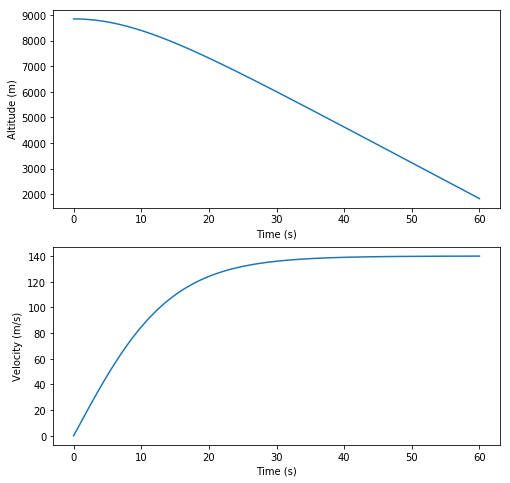

In [18]:
y = np.zeros(n,float)
vy = np.zeros(n,float)
time = np.linspace(0,Tf,n)
vy[0] = 0
y[0] = 8848

for i in range (n-1):
    vy[i+1] = vy[i] + dt*(alpha*vy[i]**2-g)
    y[i+1] = y[i] + dt*vy[i]
    

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(time, y, label="Altitude")
ax1.set(xlabel="Time (s)", ylabel="Altitude (m)")
ax2.plot(time, -vy, label="Absolute velocity")
ax2.set(xlabel="Time (s)", ylabel="Velocity (m/s)")




In [21]:
print(f"Velocity after {time[100]} seconds is {-vy[100]} m/s,\n")
print(f"Velocity after {time[n-1]} seconds is {-vy[n-1]} m/s,\n")
print(f"Altitude after {time[100]} seconds is {y[100]} m,\n")
print(f"Altitude after {time[n-1]} seconds is {y[n-1]} m,\n")

Velocity after 10.0 seconds is 84.82813787462555 m/s,

Velocity after 60.0 seconds is 140.01173220127535 m/s,

Altitude after 10.0 seconds is 8396.68808169888 m,

Altitude after 60.0 seconds is 1832.2991185533488 m,



It was measured that the final velocity of an object in the atmosphere (when speed increases, drag increases, preventing further acceleration) is 53 m/s. 

We will try to find the value of $\alpha$ to match that. Try to find this value:
- Analytically
- Confirm the value through simulation

Maximum speed when acceleration is zero:

\begin{equation}
\begin{array}{llll}
& \frac{dv_y}{dt} & = & 0 \\
\Longleftrightarrow & \alpha v_{y,max}^2 - g & = &  0 \\
\Longleftrightarrow & v_{y,max}^2 & = & \frac{g}{\alpha} \\
\Longleftrightarrow & v_{y,max} & = & \sqrt{\frac{g}{\alpha}} \\
\end{array}
\end{equation}

In our case, $v_{y,max}$ is 53 m/s, so that means:

\begin{equation}
\alpha = \frac{g}{v_{y,max}^2} \approx 0.00349 \text{m}^{-1}
\end{equation}

Velocity after 60.0 seconds is 53.01781069061016 m/s,



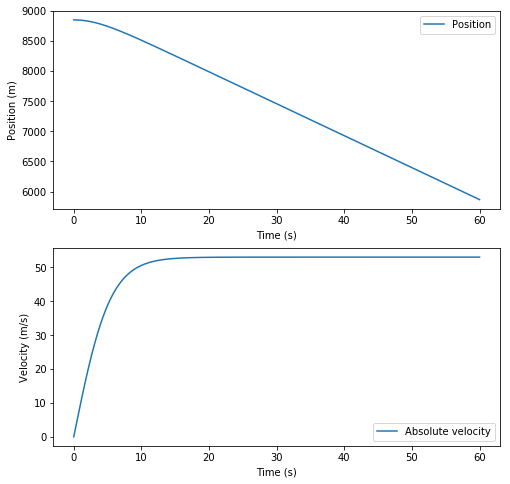

In [22]:
alpha = 0.00349
for i in range (n-1):
    vy[i+1] = vy[i] + dt*(alpha*vy[i]**2-g)
    y[i+1] = y[i] + dt*vy[i]
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(time, y, label="Position")
ax1.set(xlabel="Time (s)", ylabel="Position (m)")
ax1.legend()

ax2.plot(time, -vy, label="Absolute velocity")
ax2.set(xlabel="Time (s)", ylabel="Velocity (m/s)")
ax2.legend()

print(f"Velocity after {time[n-1]} seconds is {-vy[n-1]} m/s,\n")
